<center><h1>#2 Group Project Report</h1>
<h3>Summarization, Mapping, Hotspot Discovery and Change Analysis of High-Intensity Solar Flare Events<h3></center>

<h2><center><strong>Task 1</strong></center></h2>

<h3><strong>1. Method 1</strong> - Flare intensity estimation based on the total.counts attribute</h3>

In [62]:
import warnings
warnings.filterwarnings("ignore")

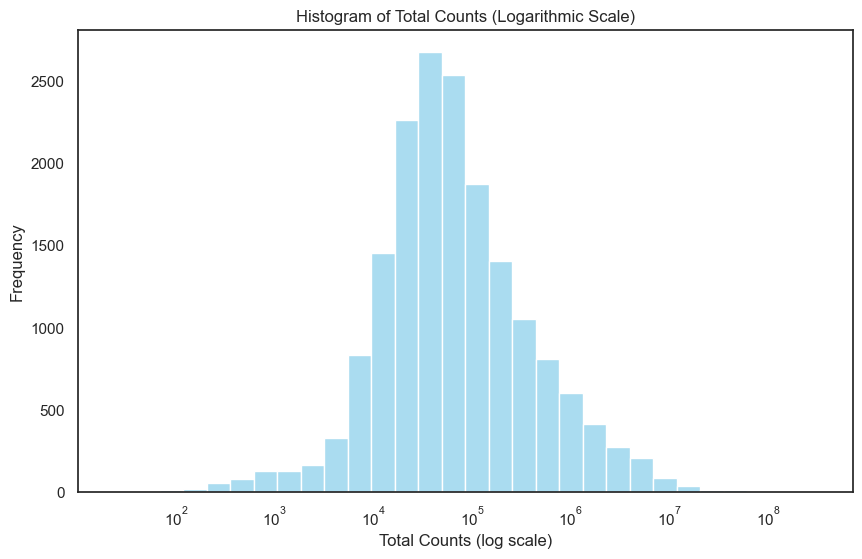

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load dataset
df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')

# Set the style for seaborn and turn off the grid
sns.set(style="white")
sns.set_palette("pastel")

# Create histogram for total counts df_1to4 using a logarithmic scale
plt.figure(figsize=(10, 6))
sns.histplot(df['total.counts'], bins=30, kde=False, color='skyblue', alpha=0.7, log_scale=True)
plt.xlabel('Total Counts (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Counts (Logarithmic Scale)')
plt.show()


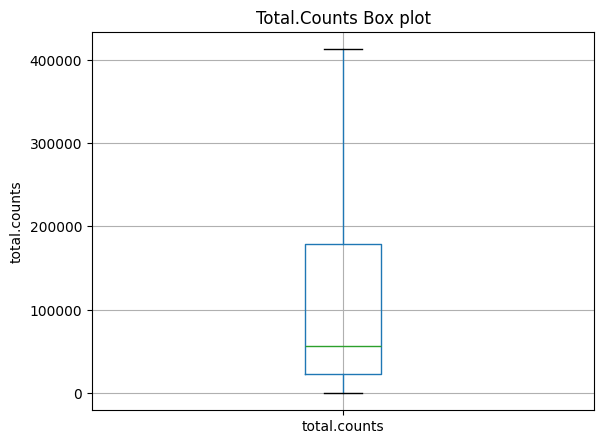

In [64]:
# Create a boxplot total counts df_1to4 without outliers
plt.figure()
df.boxplot(column='total.counts', showfliers=False)
plt.ylabel('total.counts')
plt.title('Total.Counts Box plot')
plt.tight_layout(pad=2.0)
plt.show() 

<h3><strong>2. Method 2</strong> - Flare intensity estimation based on the duration.s and energy.kev attributes</h3>

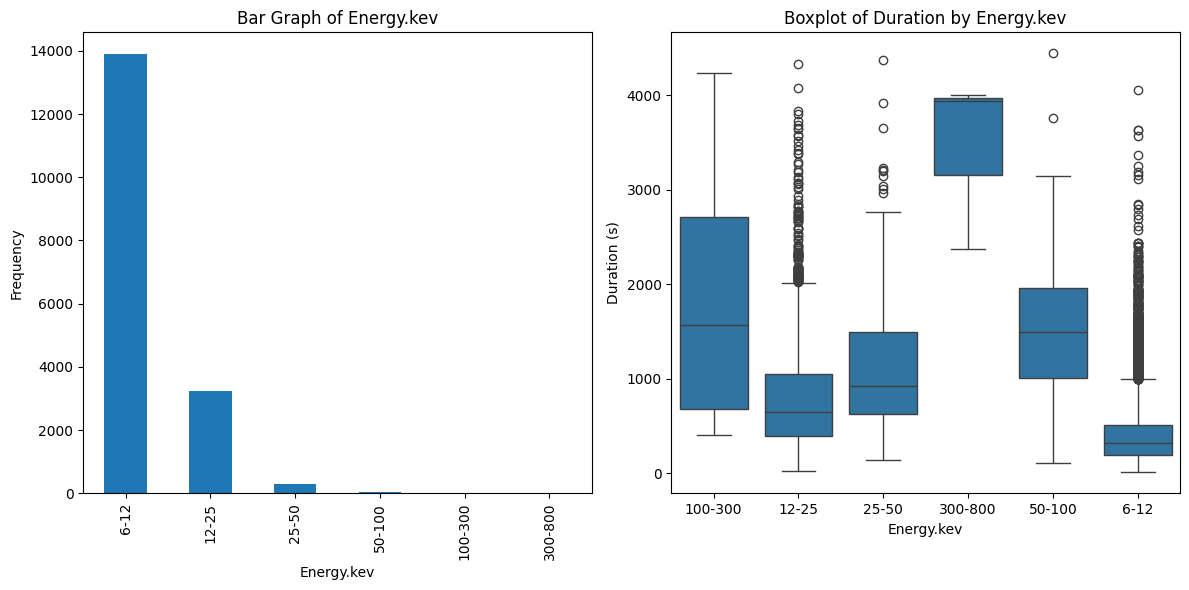

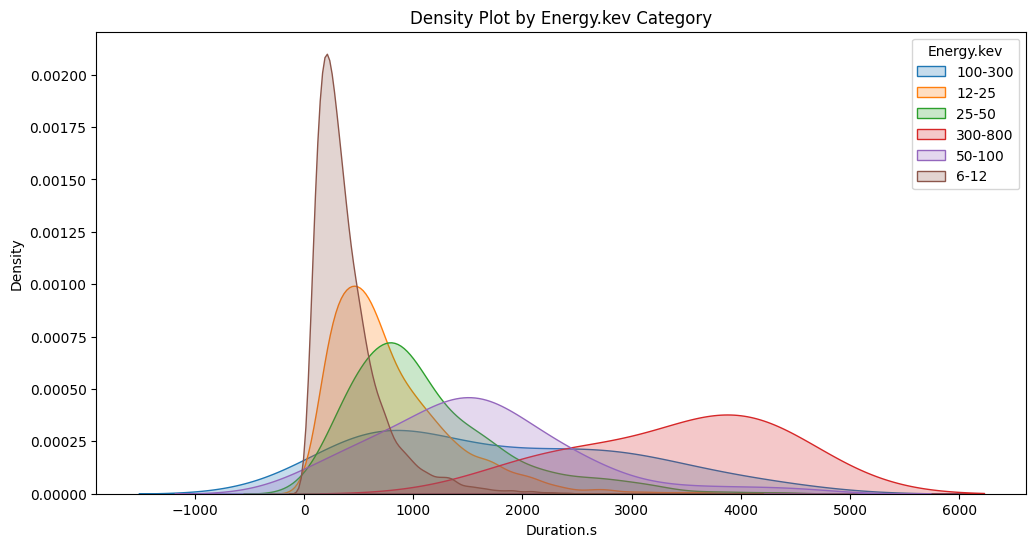

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Reading csv file
solar = pd.read_csv("Solar_flare_RHESSI_2004_05.csv")

# Converting energy to a categorical variable
solar['energy.kev'] = solar['energy.kev'].astype('category')

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar graph for energy
solar['energy.kev'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Energy.kev')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Bar Graph of Energy.kev')

# Boxplot for duration by energy
sns.boxplot(x='energy.kev', y='duration.s', data=solar, ax=axes[1])
axes[1].set_xlabel('Energy.kev')
axes[1].set_ylabel('Duration (s)')
axes[1].set_title('Boxplot of Duration by Energy.kev')

# Adjust layout
plt.tight_layout()

# Create a new figure for the density plot
plt.figure(figsize=(12, 6))

# Density plot
for category in solar['energy.kev'].cat.categories:
    subset = solar[solar['energy.kev'] == category]
    sns.kdeplot(subset['duration.s'], label=category, fill=True)

plt.legend(title='Energy.kev')
plt.xlabel('Duration.s')
plt.title('Density Plot by Energy.kev Category')

# Show the plots
plt.show()

<h3><strong>3. Method 1</strong> - Intensity heatmaps based on total.counts attribute for months 1+2+3+4 and 21+22+23+24</h3>

For Method 1, we generated two intensity heatmaps corresponding to months 1+2+3+4 and 21+22+23+24. In these heatmaps, the color of each pixel represents the intensity of solar flares at that position. The intensity is directly proportional to the values recorded in the 'total.counts' attribute.

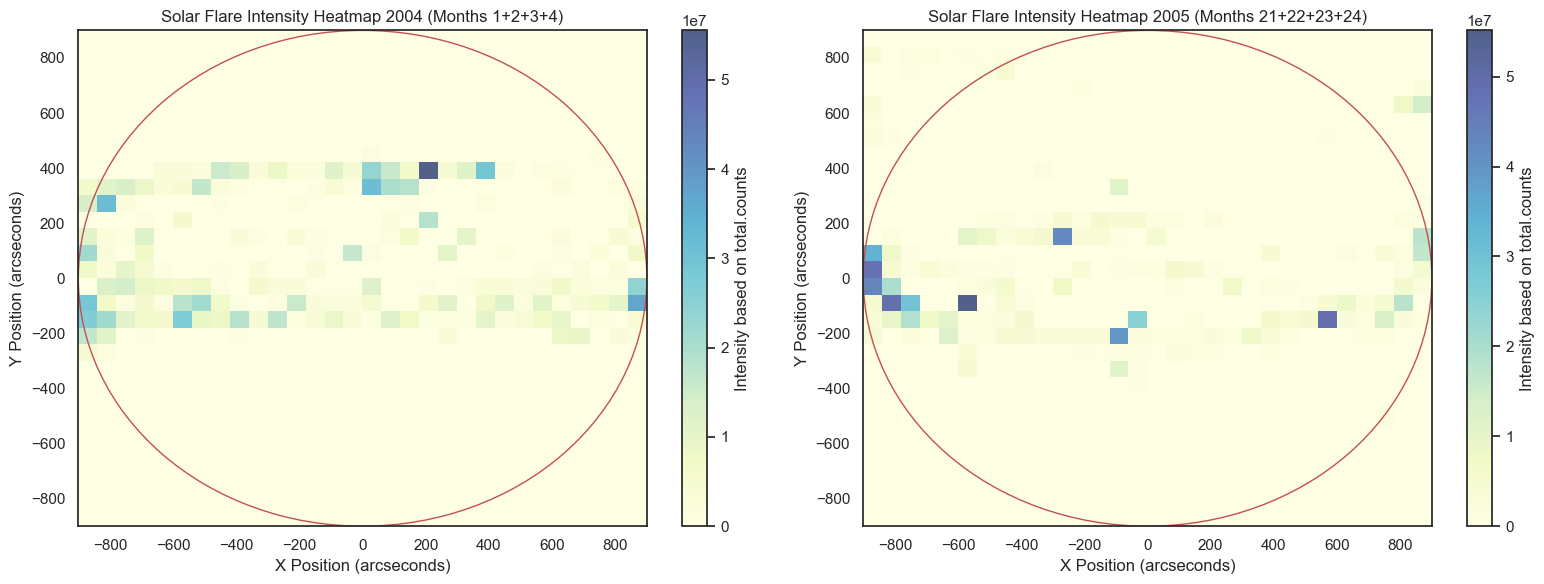

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm

# Load dataset
df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')

# Set the circle radius
circle_radius = 900  # Set the circle radius here

# Filter data for months 1+2+3+4
m_1to4 = ((df['year'] == 2004) & (df['month'].between(1, 4)))
df_1to4 = df[m_1to4]

# Filter data for months 21+22+23+24
m_21to24 = ((df['year'] == 2005) & (df['month'].between(9, 12)))
df_21to24 = df[m_21to24]

# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Increase the width between the subplots
plt.subplots_adjust(wspace=0.4)

# Create a heatmap for months 1+2+3+4
heatmap1, xedges1, yedges1 = np.histogram2d(
    df_1to4['x.pos.asec'], df_1to4['y.pos.asec'], bins=30, weights=df_1to4['total.counts']
)
extent1 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
sc1 = axes[0].imshow(
    heatmap1.T, extent=extent1, origin='lower', aspect='auto', cmap='YlGnBu', alpha=0.7
)
axes[0].set_title('Solar Flare Intensity Heatmap 2004 (Months 1+2+3+4)')
axes[0].set_xlabel('X Position (arcseconds)')
axes[0].set_ylabel('Y Position (arcseconds)')
circle1 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
axes[0].add_artist(circle1)
cbar1 = fig.colorbar(sc1, ax=axes[0], label='Intensity based on total.counts')

# Create a heatmap for months 21+22+23+24
heatmap2, xedges2, yedges2 = np.histogram2d(
    df_21to24['x.pos.asec'], df_21to24['y.pos.asec'], bins=30, weights=df_21to24['total.counts']
)
extent2 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
sc2 = axes[1].imshow(
    heatmap2.T, extent=extent2, origin='lower', aspect='auto', cmap='YlGnBu', alpha=0.7
)
axes[1].set_title('Solar Flare Intensity Heatmap 2005 (Months 21+22+23+24)')
axes[1].set_xlabel('X Position (arcseconds)')
axes[1].set_ylabel('Y Position (arcseconds)')
circle2 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
axes[1].add_artist(circle2)
cbar2 = fig.colorbar(sc2, ax=axes[1], label='Intensity based on total.counts')

plt.tight_layout()
plt.show()



<h3><strong>4. Method 2</strong> - Intensity heatmaps based on duration.s and energy.kev attributes for months 1+2+3+4 and 21+22+23+24</h3>

For Method 2, the intensity estimation is computed using the formula:
<p><img src="image.png" style="width:350px;height:60px;"></p>
where the duration.s attribute represents the duration of the solar flare, and the energy.kev.i and energy.kev.f attributes contain the initial and final values of the energy range of the solar flare, respectively. The average energy of the solar flare is then multiplied by the duration to obtain the corresponding intensity.
<p>A logarithmic color scale had to be applied (LogNorm) to enhance the visualization of intensity difference. This was done because the intensity values mostly spanned in the low-intensity regions.
The minimum and maximum values for the logarithmic scale (vmin and vmax) are calculated based on the minimum and maximum values of the intensity computed from the entire dataset.
By incorporating a logarithmic scale, the resulting heatmaps effectively display the intensity variations.</p>

 



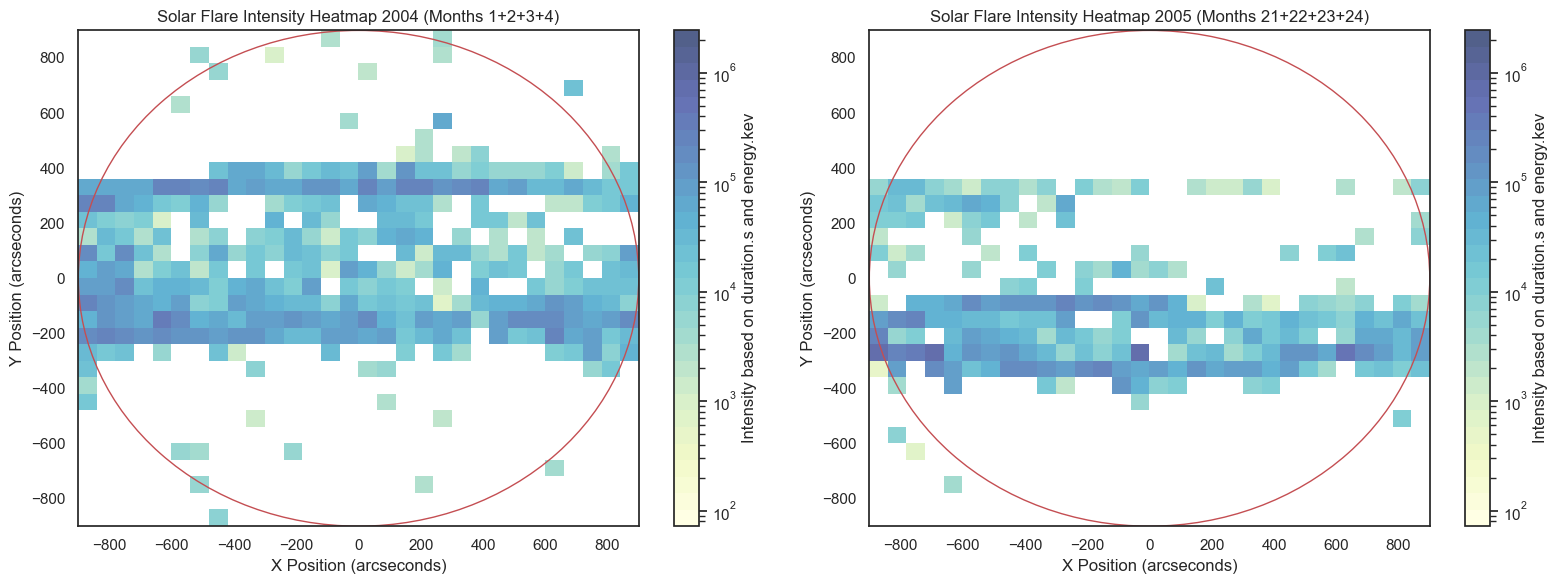

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import BoundaryNorm, ListedColormap

# Load dataset
df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')

# Filter data for months 1+2+3+4
m_1to4 = ((df['year'] == 2004) & (df['month'].between(1, 4)))
df_1to4 = df[m_1to4]

# Filter data for months 21+22+23+24
m_21to24 = ((df['year'] == 2005) & (df['month'].between(9, 12)))
df_21to24 = df[m_21to24]

# Create colormap and norm with logarithmic scale
cmap = plt.get_cmap('YlGnBu', 30)  # Use 30 bins for intensity values
intensity_min = df['duration.s'].min() * (df['energy.kev.f'] + df['energy.kev.i']).min() / 2.0
intensity_max = df['duration.s'].max() * (df['energy.kev.f'] + df['energy.kev.i']).max() / 2.0
log_norm = LogNorm(vmin=intensity_min, vmax=intensity_max)

# Set the circle radius
circle_radius = 900

# Create a figure with one row and two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Increase the width between the subplots
plt.subplots_adjust(wspace=0.4)

# Create a heatmap for months 1+2+3+4
heatmap1, xedges1, yedges1 = np.histogram2d(
    df_1to4['x.pos.asec'], df_1to4['y.pos.asec'], bins=30,
    range=[[-circle_radius, circle_radius], [-circle_radius, circle_radius]],
    weights=df_1to4['duration.s'] * (df_1to4['energy.kev.f'] + df_1to4['energy.kev.i']) / 2.0
)
extent1 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
sc1 = ax1.imshow(heatmap1.T, extent=extent1, origin='lower', aspect='auto', cmap=cmap, alpha=0.7, norm=log_norm)
ax1.set_title('Solar Flare Intensity Heatmap 2004 (Months 1+2+3+4)')
ax1.set_xlabel('X Position (arcseconds)')
ax1.set_ylabel('Y Position (arcseconds)')
circle1 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax1.add_artist(circle1)
cbar1 = fig.colorbar(sc1, ax=ax1, label='Intensity based on duration.s and energy.kev')

# Create a heatmap for months 21+22+23+24
heatmap2, xedges2, yedges2 = np.histogram2d(
    df_21to24['x.pos.asec'], df_21to24['y.pos.asec'], bins=30,
    range=[[-circle_radius, circle_radius], [-circle_radius, circle_radius]],
    weights=df_21to24['duration.s'] * (df_21to24['energy.kev.f'] + df_21to24['energy.kev.i']) / 2.0
)
extent2 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
sc2 = ax2.imshow(heatmap2.T, extent=extent2, origin='lower', aspect='auto', cmap=cmap, alpha=0.7, norm=log_norm)
ax2.set_title('Solar Flare Intensity Heatmap 2005 (Months 21+22+23+24)')
ax2.set_xlabel('X Position (arcseconds)')
ax2.set_ylabel('Y Position (arcseconds)')
circle2 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax2.add_artist(circle2)
cbar2 = fig.colorbar(sc2, ax=ax2, label='Intensity based on duration.s and energy.kev')

# Adjust layout
plt.tight_layout()
plt.show()



<h3><strong>5. Intensity Map Comparison</strong></h3>

Upon comparing the intensity maps based on total counts with those derived from duration and energy, we observe an overall higher solar flare intensity estimation for months 1+2+3+4 than for months 21+22+23+24. This suggests a correlation between the total counts, duration, and energy attributes. Additionally, we note that the intensity estimation of the solar flares is concentrated within position ranges of -400 to 400 on the Y-axis.

<h2><center><strong>Task 2</strong></center></h2>

<h3><strong>Hotspot Algorithm, Threshold & Visualization</strong></h3>

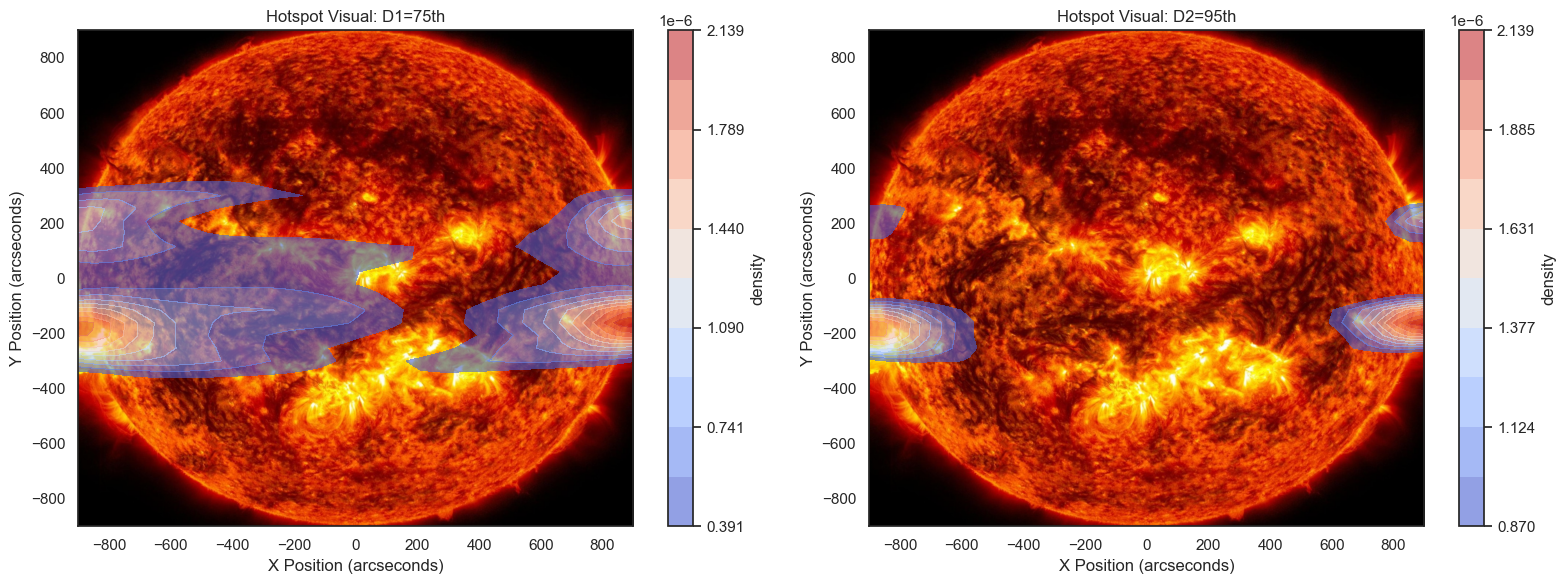

In [117]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

# Read data file and set d1
df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')

# Create kernel density estimation
data = np.vstack([df['x.pos.asec'], df['y.pos.asec']])
kde = gaussian_kde(data)

# Create a gridspace and evaluate KDE
xgrid = np.linspace(-900, 900, 40)
ygrid = np.linspace(-900, 900, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

grid_points = np.vstack([Xgrid.ravel(), Ygrid.ravel()])
Z = kde.evaluate(grid_points).reshape(Xgrid.shape)
thresholdZData = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
d1 = np.percentile(thresholdZData, 75)  # Change this threshold value as needed
d2 = np.percentile(thresholdZData, 95)  # Change this threshold value as needed

# Insert image of the sun as the background
sunBackground = mpimg.imread('sun.jpg')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the hotspots for d1
axes[0].imshow(sunBackground, extent=[-900, 900, -900, 900], aspect='auto')
d1ContourLevels = np.linspace(d1, max(thresholdZData), 11)
contour1 = axes[0].contourf(Xgrid, Ygrid, Z, d1ContourLevels, cmap='coolwarm', origin='lower', alpha=.6)
cb1 = fig.colorbar(contour1, ax=axes[0], label='density')
axes[0].set_xlabel('X Position (arcseconds)')
axes[0].set_ylabel('Y Position (arcseconds)')
axes[0].set_title('Hotspot Visual: D1=75th')

# Plot the hotspots for d2
axes[1].imshow(sunBackground, extent=[-900, 900, -900, 900], aspect='auto')
d2ContourLevels = np.linspace(d2, max(thresholdZData), 11)
contour2 = axes[1].contourf(Xgrid, Ygrid, Z, d2ContourLevels, cmap='coolwarm', origin='lower', alpha=.6)
cb2 = fig.colorbar(contour2, ax=axes[1], label='density')
axes[1].set_xlabel('X Position (arcseconds)')
axes[1].set_ylabel('Y Position (arcseconds)')
axes[1].set_title('Hotspot Visual: D2=95th')

# Adjust layout
plt.tight_layout()
plt.show()

We developed the hotspot algorithm utilizing kernel density estimation to analyze the spatial distribution and precisely locate the hotspots on the sun using a 2D gridspace. After creating the regions, we filtered the data based on the selected threshold values. Subsequently, we generated a KDE plot and used the "coolwarm" color scheme to effectively pinpoint and enhance the visibility of these hotspots.

To determine our threshold values, d1 and d2, we relied on the 75th and 95th percentiles of the density points. We opted for these percentiles because we recognize that hotspots consist of elevated concentrations of data points, surpassing the mean or 50th percentile. By selecting the 75th percentile, we effectively isolated the top 25% of our data, defining larger, more regionally significant hotspots with intensities exceeding a "medium-high" level. In contrast, the 95th percentile pinpointed the top 5% of our data, accurately representing smaller, highly concentrated hotspots with densities surpassing a "high" intensity threshold.

<h3><strong>Time Series Hotspots</strong></h3>

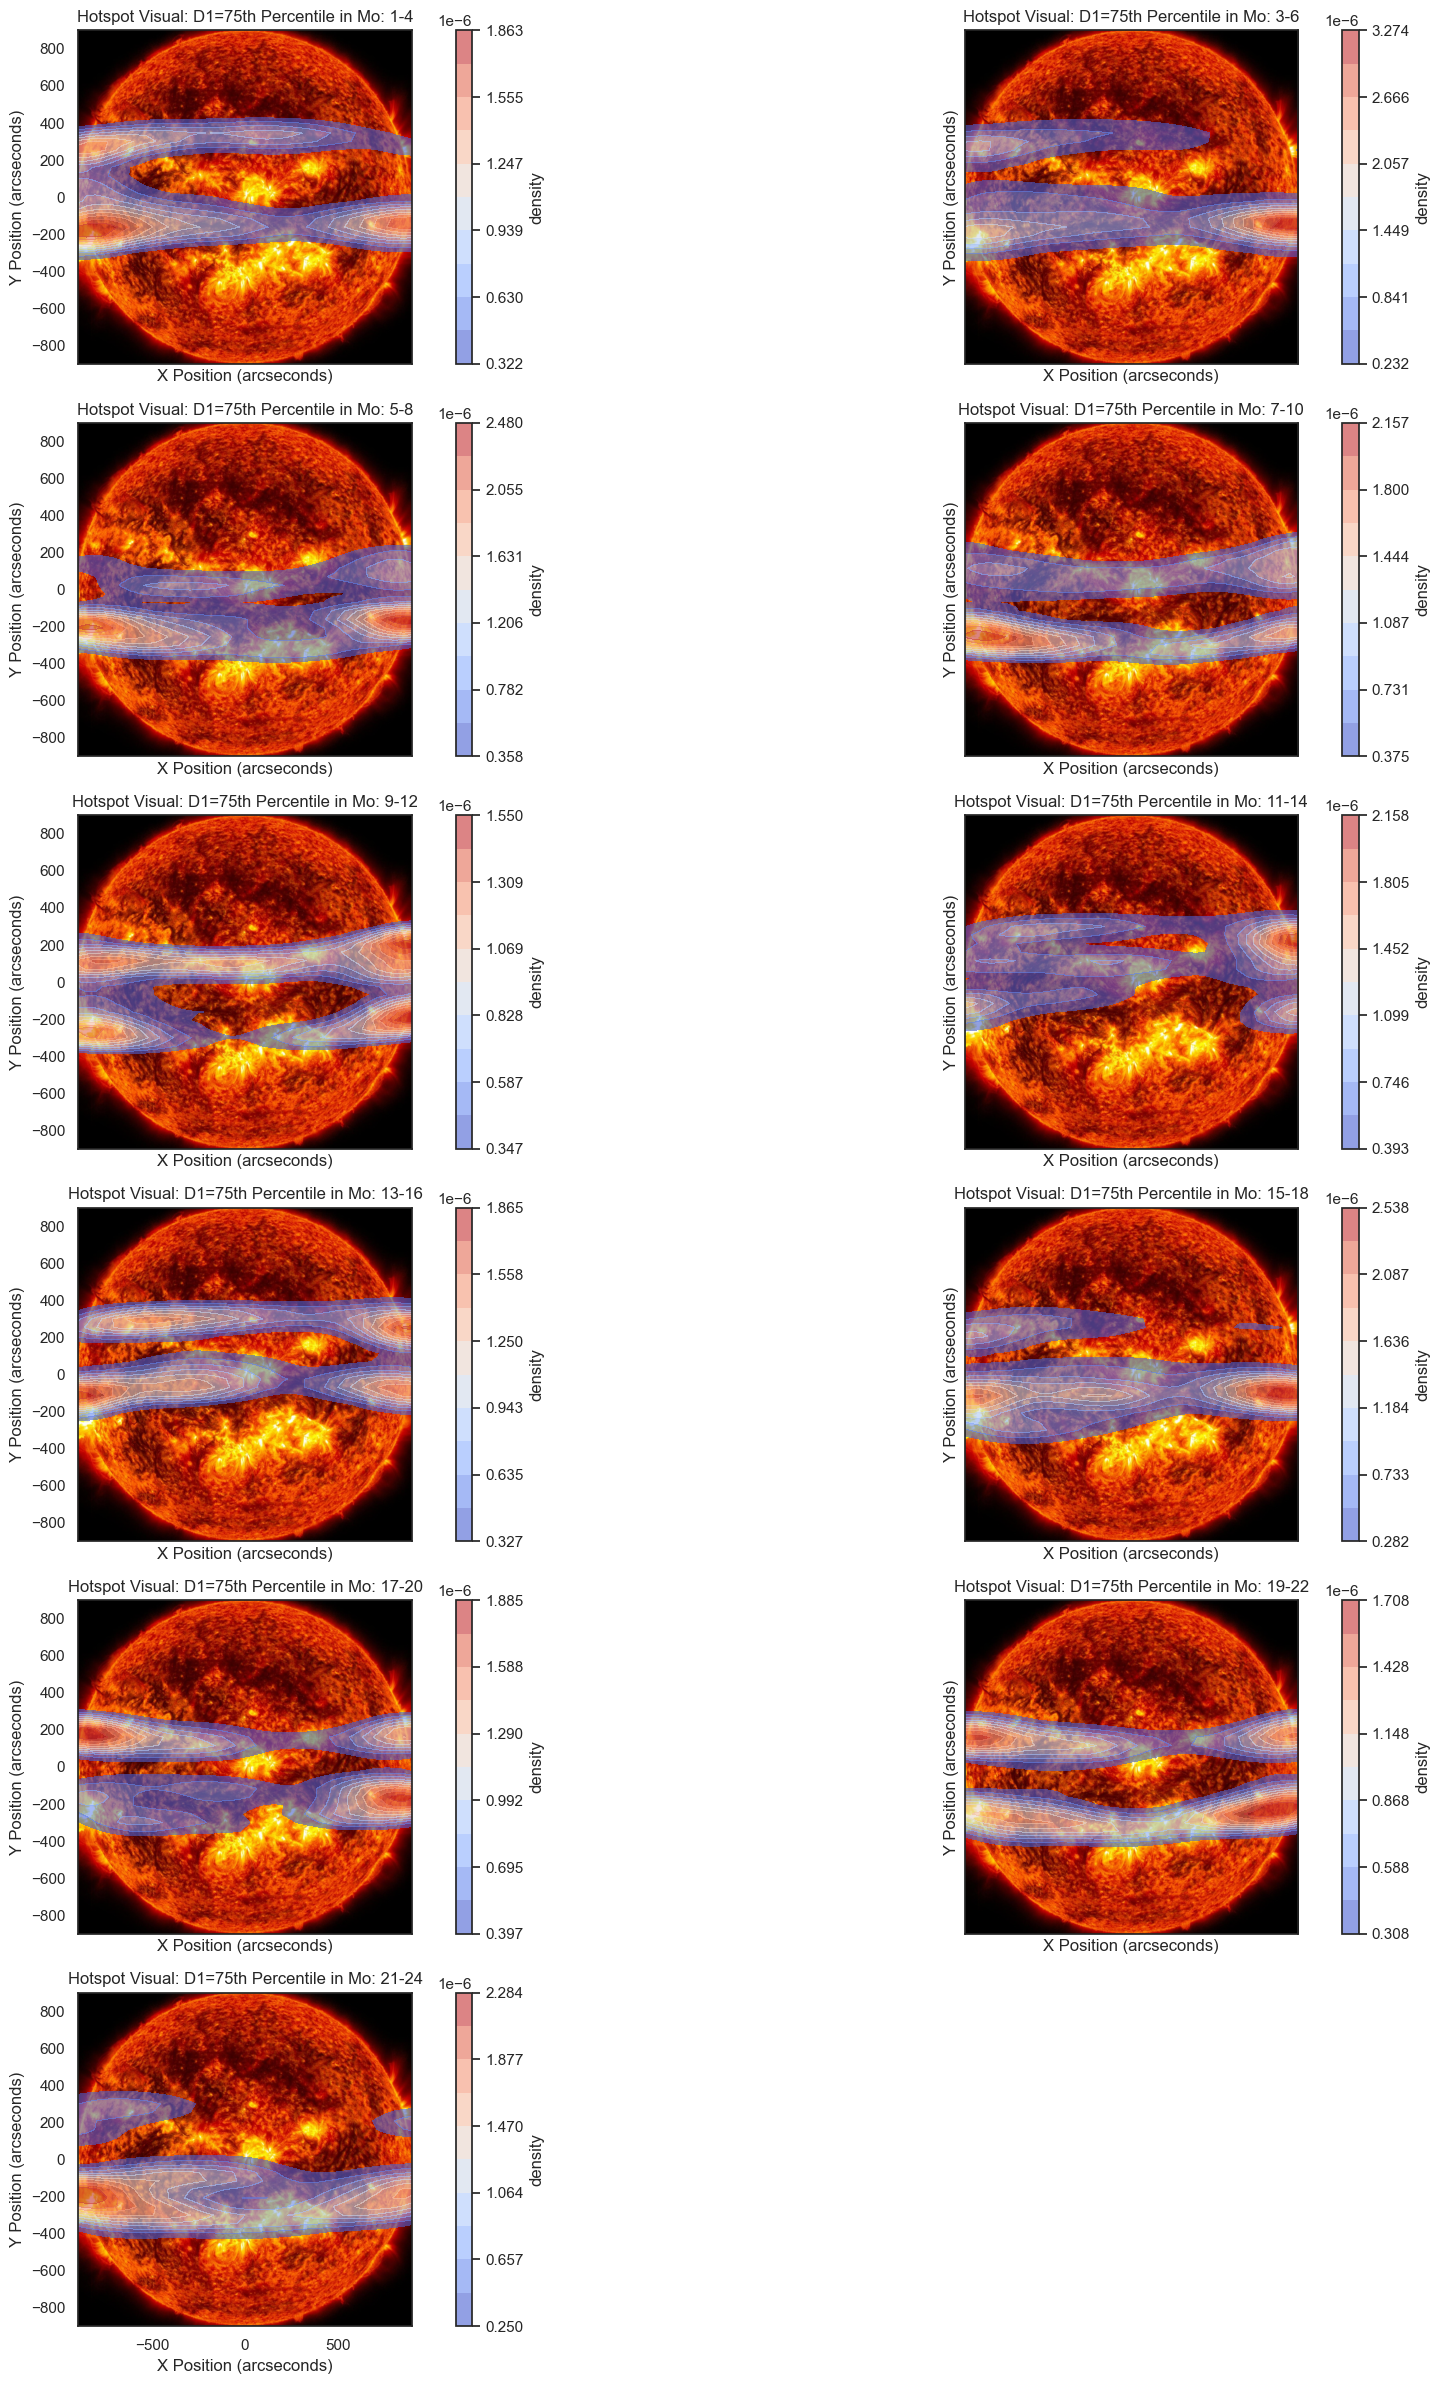

In [126]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# read data file and set d1
df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')

# iterate through the beginning month of every batch
months = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
num_plots = len(months)

# determine the number of rows and columns for subplots
num_rows = (num_plots + 1) // 2
num_cols = 2

# set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4), sharex=True, sharey=True)

# flatten the axes for easy iteration
axes = axes.flatten()

for i, month in enumerate(months):
    if month < 11:
        cond = ((df['year'] == 2004) & (df['month'].between(month, month + 3)))
    elif month == 11:
        cond = ((df['year'] == 2004) & (df['month'].between(month, 12))) | (
            (df['year'] == 2005) & (df['month'].between(1, 2))
        )
    else:
        cond = ((df['year'] == 2005) & (df['month'].between(month - 12, month - 9)))

    # separate out batch data and create kde
    batch = df[cond]
    data = np.vstack([batch['x.pos.asec'], batch['y.pos.asec']])
    kde = gaussian_kde(data)

    # create a gridspace and evaluate kde
    xgrid = np.linspace(-900, 900, 40)
    ygrid = np.linspace(-900, 900, 40)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    gridPoints = np.vstack([Xgrid.ravel(), Ygrid.ravel()])

    # use Z to hold the density values and then create d1
    Z = kde.evaluate(gridPoints).reshape(Xgrid.shape)
    thresholdZData = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    d1 = np.percentile(thresholdZData, 75)

    # insert image of the sun as the background
    sunBackground = mpimg.imread('sun.jpg')

    # select the appropriate subplot
    plt.sca(axes[i])

    plt.imshow(sunBackground, extent=[-900, 900, -900, 900], aspect='auto')

    # plot the hotspots
    contourLevels = np.linspace(d1, max(thresholdZData), 11)
    plt.contourf(Xgrid, Ygrid, Z, contourLevels, cmap='coolwarm', origin='lower', alpha=.6)
    cb = plt.colorbar()
    cb.set_label("density")
    plt.xlabel('X Position (arcseconds)')
    plt.ylabel('Y Position (arcseconds)')
    plt.title('Hotspot Visual: D1=75th Percentile in Mo: ' + str(month) + '-' + str(month + 3))

    # Set aspect ratio to be equal
    axes[i].set_aspect('equal')

# Remove the last subplot if it's empty
if len(months) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout with increased spacing between subplots
plt.tight_layout()
plt.show()



e.	Create a time series of 11 hotspots for the 11 batches using intensity threshold d2

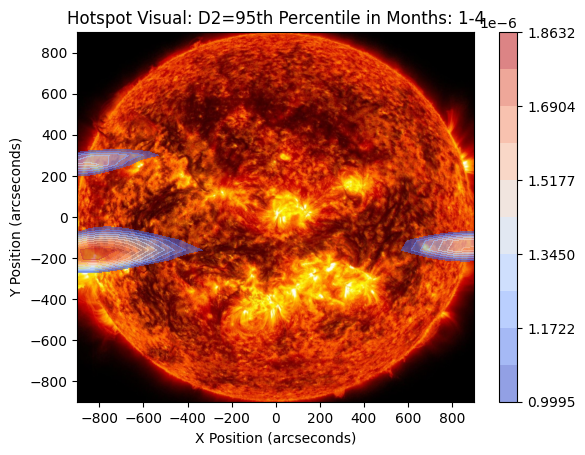

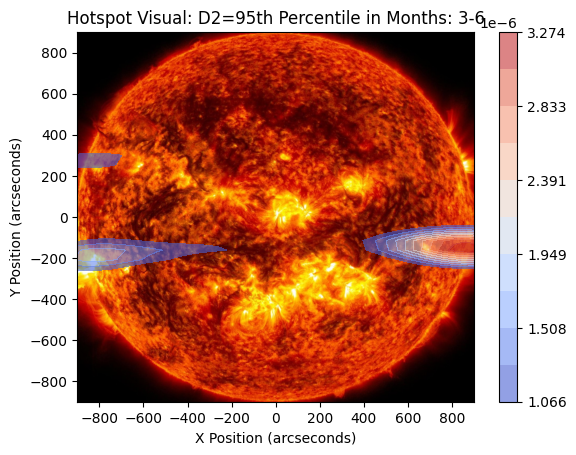

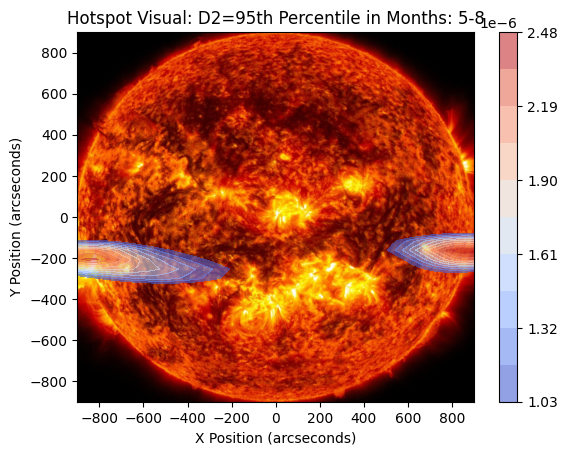

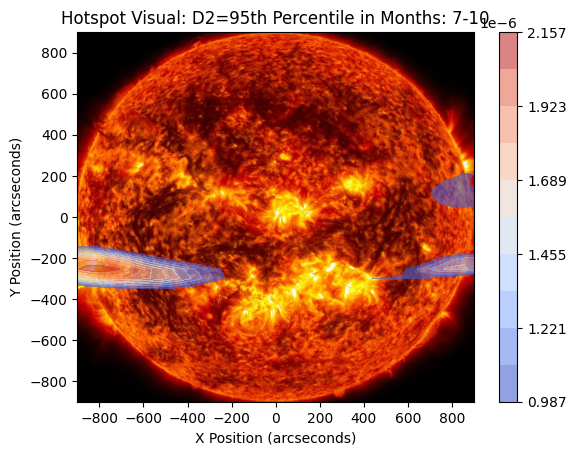

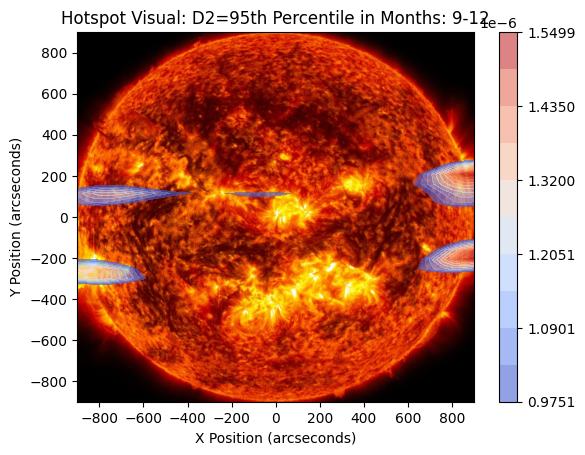

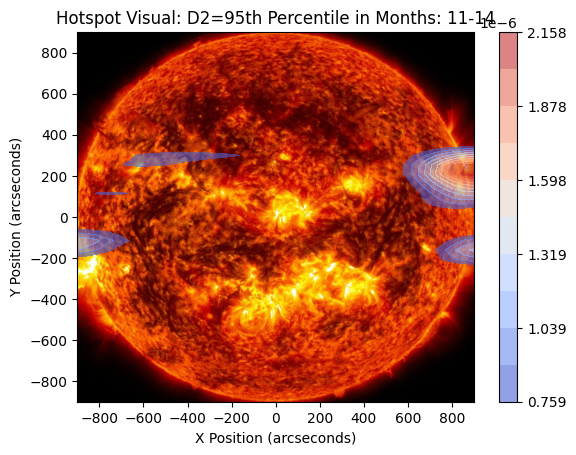

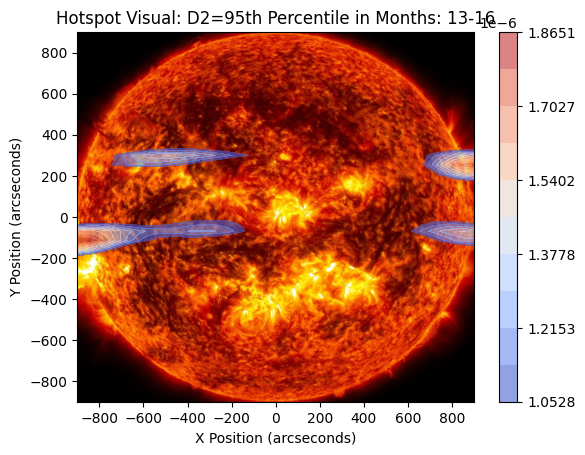

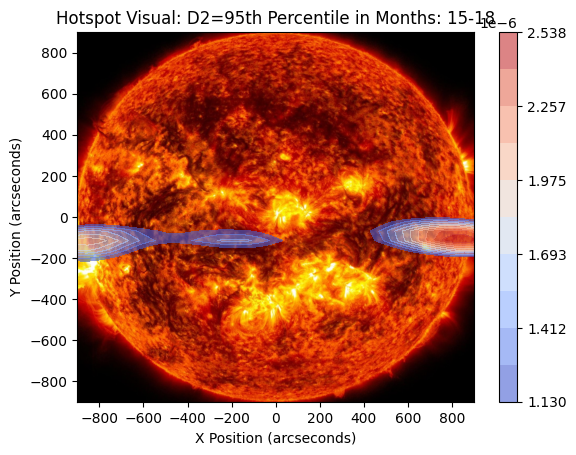

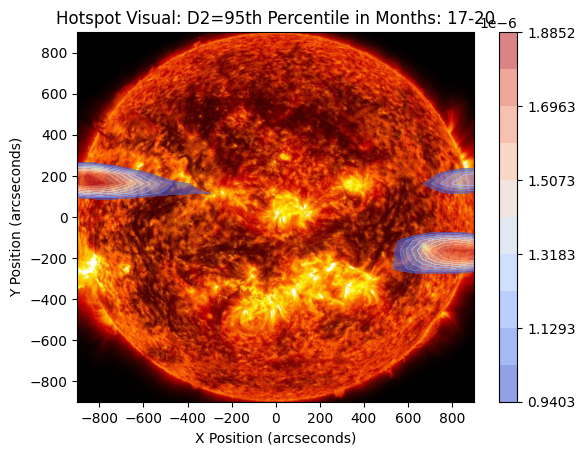

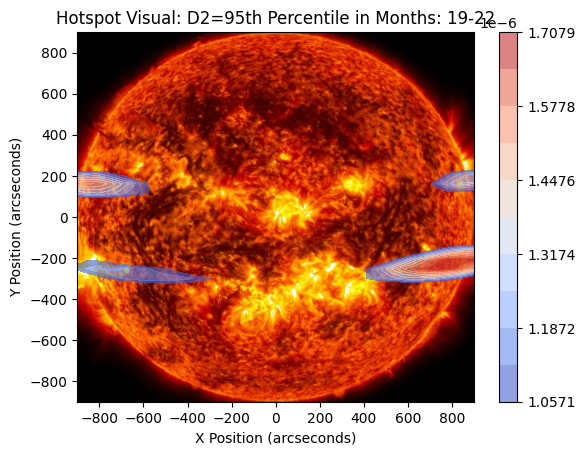

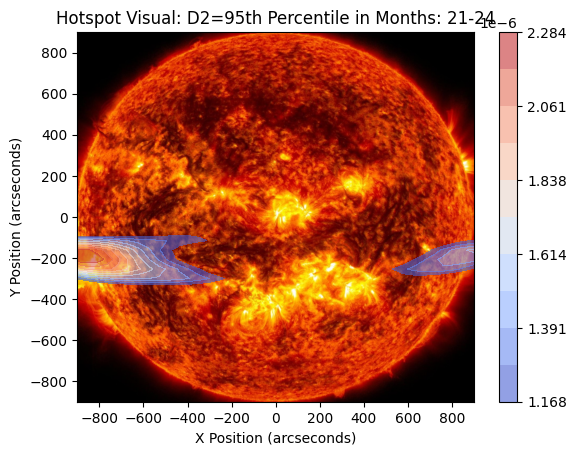

In [70]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# read data file and set d1
df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')

# iterate through the begining month of every batch
months = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
for month in months:
    if month < 11:
        cond = ((df['year'] == 2004) & (df['month'].between(month, month+3)))
    elif month == 11:
        cond = ((df['year'] == 2004) & (df['month'].between(month, 12))) | ((df['year'] == 2005) & (df['month'].between(1, 2))) 
    else:
        cond = ((df['year'] == 2005) & (df['month'].between(month-12, month-9)))

    # separate out batch data and create kde
    batch = df[cond]
    data = np.vstack([batch['x.pos.asec'], batch['y.pos.asec']])
    kde = gaussian_kde(data)

    # create a gridspace and evaluate kde
    xgrid = np.linspace(-900, 900, 40)
    ygrid = np.linspace(-900, 900, 40)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    gridPoints = np.vstack([Xgrid.ravel(), Ygrid.ravel()])

    # use Z to hold the density values and then create d2
    Z = kde.evaluate(gridPoints).reshape(Xgrid.shape)
    thresholdZData = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))    
    d2 = np.percentile(thresholdZData, 95)     

    # insert image of the sun as the background
    sunBackground = mpimg.imread('sun.jpg')
    plt.imshow(sunBackground, extent=[-900, 900, -900, 900], aspect='auto')

    # plot the hotspots
    contourLevels = np.linspace(d2 , max(thresholdZData), 11)
    plt.contourf(Xgrid, Ygrid, Z, contourLevels, cmap='coolwarm', origin='lower', alpha=.6) 
    cb.set_label("density")
    cb = plt.colorbar()
    plt.xlabel('X Position (arcseconds)')
    plt.ylabel('Y Position (arcseconds)')
    plt.title('Hotspot Visual: D2=95th Percentile in Months: ' + str(month) + '-' + str(month+3))
    plt.show()


<h2><center><strong>Task 3</strong></center></h2>

<h3><strong>2. Method 2</strong></h3>

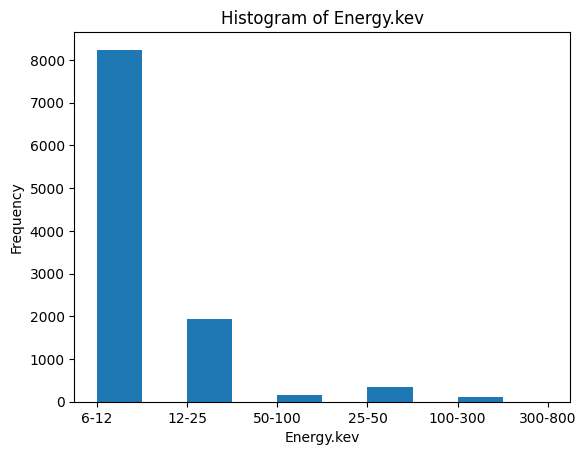

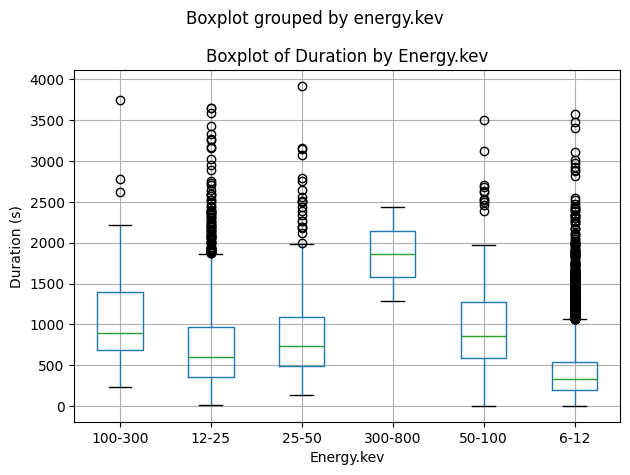

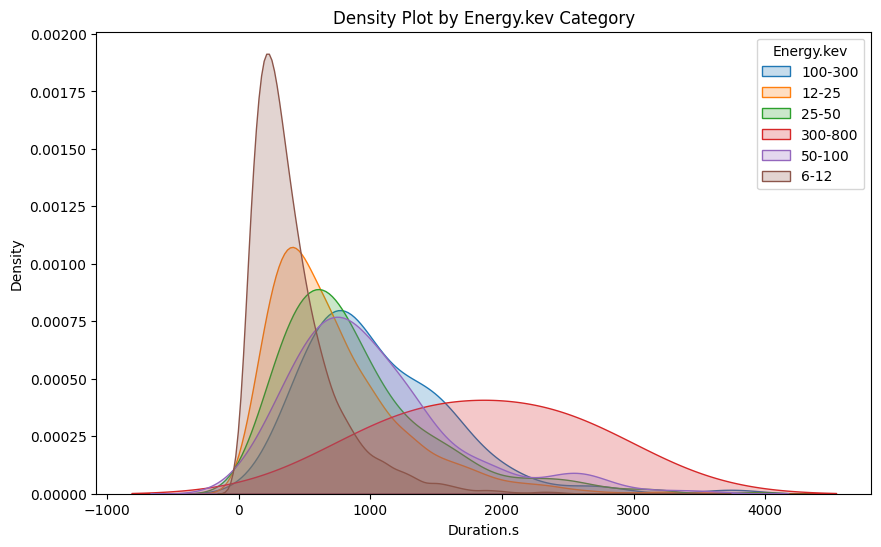

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Reading csv file
solar = pd.read_csv("Solar_flare_RHESSI_2015_16.csv")

#Converting energy to a categorical variable
solar['energy.kev'] = solar['energy.kev'].astype('category')

#Create histogram for energy
plt.hist(solar['energy.kev'])
plt.xlabel('Energy.kev')
plt.ylabel('Frequency')
plt.title('Histogram of Energy.kev')


# Create a boxplot
solar.boxplot(column='duration.s', by='energy.kev', vert=True)
plt.xlabel('Energy.kev')
plt.ylabel('Duration (s)')
plt.title('Boxplot of Duration by Energy.kev')
plt.tight_layout()



# Density Plot - Kernel Density Estimation
# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate through each 'energy.kev' category and plot the KDE
for category in solar['energy.kev'].cat.categories:
    subset = solar[solar['energy.kev'] == category]
    sns.kdeplot(subset['duration.s'], label=category, fill=True)

plt.legend(title='Energy.kev')
plt.xlabel('Duration.s')
plt.title('Density Plot by Energy.kev Category')
  
plt.show() 

In 2004-2005, it seems that '6-12' energy bands have the highest frequency and the '300-800' energy bands have the longest duration while '6-12' have the shortest. We can also see there also seems to be a relation that as the energy levels increase, so does the duration of the flare. This is more appparent in the 2015-2016 where the peaks of each energy category seem to be in order as the duration increases.
From 2004-2005 to 2015-2016, there seems to be a major change in the energy levels and duration although the initial observation stays the same. The frequency of the energy bands decreased with '6-12' band experience the greatest decline. There also seems to be a trend of decrease between the energy bands and the duration with '300-800' experience the sharpest.

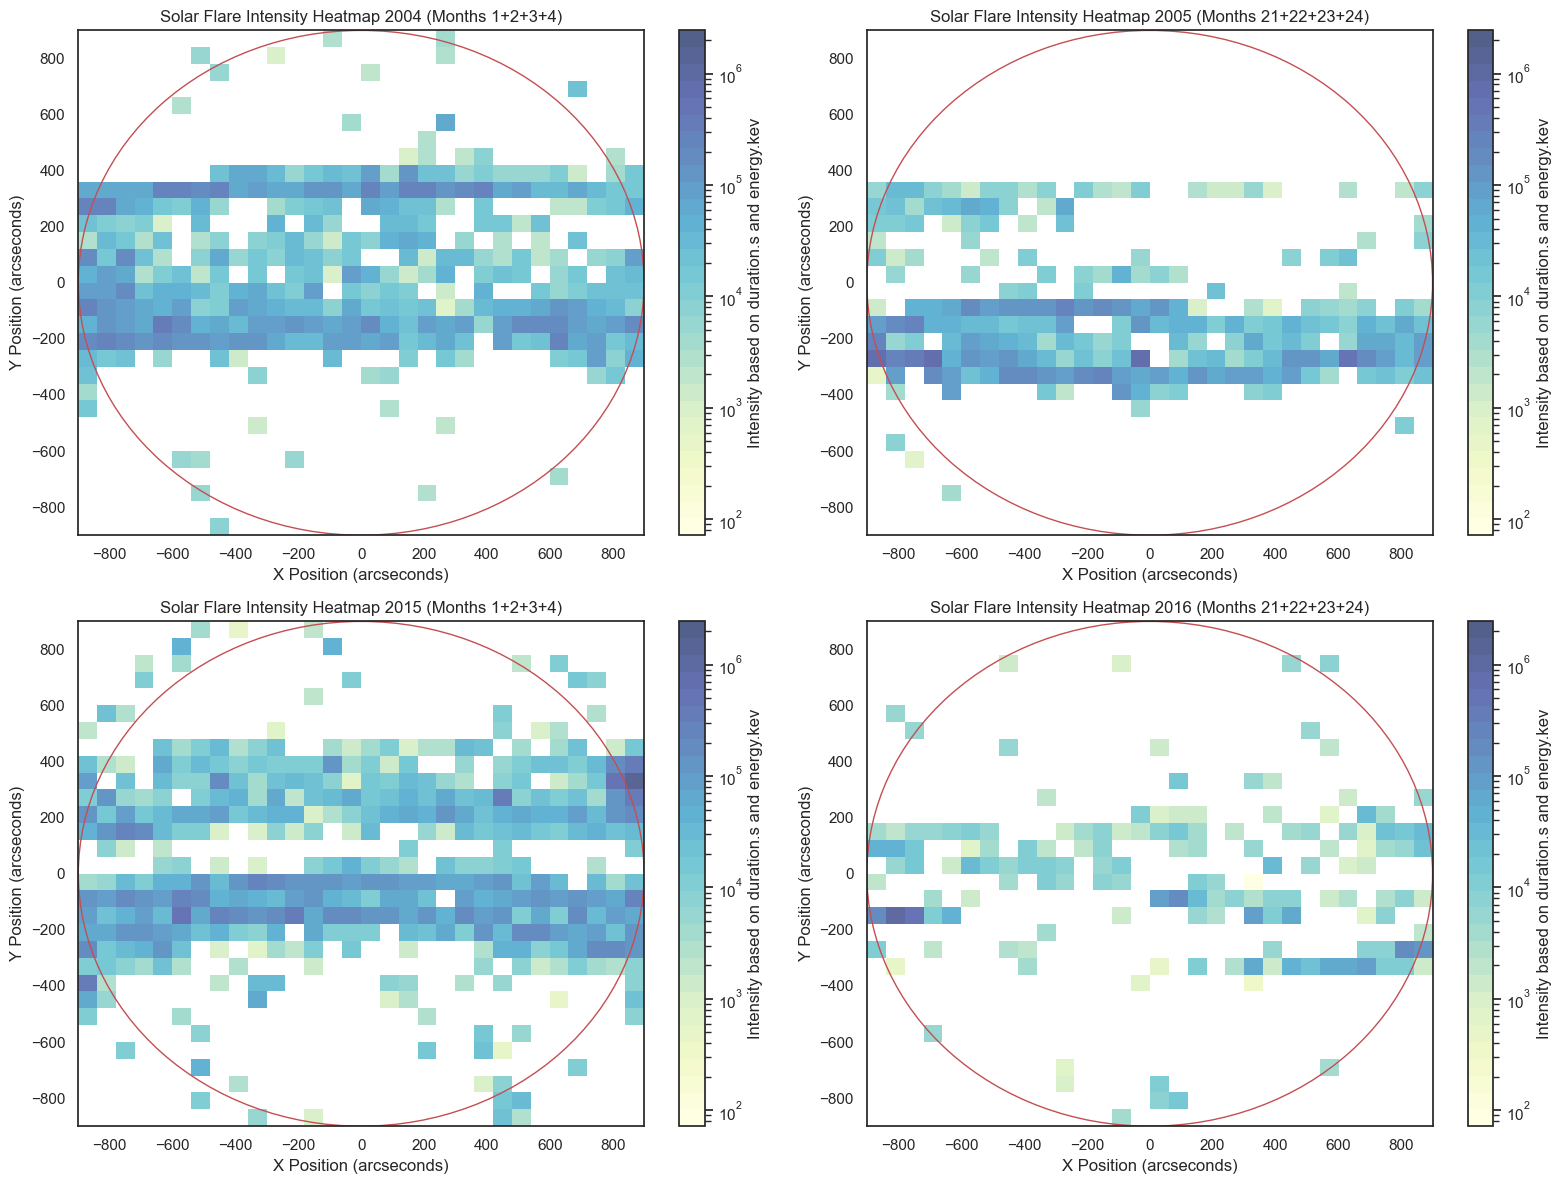

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm

# Load dataset
df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')

# Filter data for months 1+2+3+4
m_1to4 = ((df['year'] == 2004) & (df['month'].between(1, 4)))
df_1to4 = df[m_1to4]

# Filter data for months 21+22+23+24
m_21to24 = ((df['year'] == 2005) & (df['month'].between(9, 12)))
df_21to24 = df[m_21to24]

# Load dataset for the other two plots
df2 = pd.read_csv('Solar_flare_RHESSI_2015_16.csv')

# Filter data for months 1+2+3+4
m_1to4_2 = ((df2['year'] == 2015) & (df2['month'].between(1, 4)))
df_1to4_2 = df2[m_1to4_2]

# Filter data for months 21+22+23+24
m_21to24_2 = ((df2['year'] == 2016) & (df2['month'].between(9, 12)))
df_21to24_2 = df2[m_21to24_2]

# Create colormap and norm with logarithmic scale
cmap = plt.get_cmap('YlGnBu', 30)  # Use 30 bins for intensity values
intensity_min = df['duration.s'].min() * (df['energy.kev.f'] + df['energy.kev.i']).min() / 2.0
intensity_max = df['duration.s'].max() * (df['energy.kev.f'] + df['energy.kev.i']).max() / 2.0
log_norm = LogNorm(vmin=intensity_min, vmax=intensity_max)

# Set the circle radius
circle_radius = 900

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Create a heatmap for months 1+2+3+4 (first subplot)
heatmap1, xedges1, yedges1 = np.histogram2d(
    df_1to4['x.pos.asec'], df_1to4['y.pos.asec'], bins=30,
    range=[[-circle_radius, circle_radius], [-circle_radius, circle_radius]],
    weights=df_1to4['duration.s'] * (df_1to4['energy.kev.f'] + df_1to4['energy.kev.i']) / 2.0
)
extent1 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
sc1 = axes[0, 0].imshow(heatmap1.T, extent=extent1, origin='lower', aspect='auto', cmap=cmap, alpha=0.7, norm=log_norm)
axes[0, 0].set_title('Solar Flare Intensity Heatmap 2004 (Months 1+2+3+4)')
axes[0, 0].set_xlabel('X Position (arcseconds)')
axes[0, 0].set_ylabel('Y Position (arcseconds)')
circle1 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
axes[0, 0].add_artist(circle1)
cbar1 = fig.colorbar(sc1, ax=axes[0, 0], label='Intensity based on duration.s and energy.kev')

# Create a heatmap for months 21+22+23+24 (second subplot)
heatmap2, xedges2, yedges2 = np.histogram2d(
    df_21to24['x.pos.asec'], df_21to24['y.pos.asec'], bins=30,
    range=[[-circle_radius, circle_radius], [-circle_radius, circle_radius]],
    weights=df_21to24['duration.s'] * (df_21to24['energy.kev.f'] + df_21to24['energy.kev.i']) / 2.0
)
extent2 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
sc2 = axes[0, 1].imshow(heatmap2.T, extent=extent2, origin='lower', aspect='auto', cmap=cmap, alpha=0.7, norm=log_norm)
axes[0, 1].set_title('Solar Flare Intensity Heatmap 2005 (Months 21+22+23+24)')
axes[0, 1].set_xlabel('X Position (arcseconds)')
axes[0, 1].set_ylabel('Y Position (arcseconds)')
circle2 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
axes[0, 1].add_artist(circle2)
cbar2 = fig.colorbar(sc2, ax=axes[0, 1], label='Intensity based on duration.s and energy.kev')

# Create a heatmap for months 1+2+3+4 (third subplot)
heatmap3, xedges3, yedges3 = np.histogram2d(
    df_1to4_2['x.pos.asec'], df_1to4_2['y.pos.asec'], bins=30,
    range=[[-circle_radius, circle_radius], [-circle_radius, circle_radius]],
    weights=df_1to4_2['duration.s'] * (df_1to4_2['energy.kev.f'] + df_1to4_2['energy.kev.i']) / 2.0
)
extent3 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
sc3 = axes[1, 0].imshow(heatmap3.T, extent=extent3, origin='lower', aspect='auto', cmap=cmap, alpha=0.7, norm=log_norm)
axes[1, 0].set_title('Solar Flare Intensity Heatmap 2015 (Months 1+2+3+4)')
axes[1, 0].set_xlabel('X Position (arcseconds)')
axes[1, 0].set_ylabel('Y Position (arcseconds)')
circle3 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
axes[1, 0].add_artist(circle3)
cbar3 = fig.colorbar(sc3, ax=axes[1, 0], label='Intensity based on duration.s and energy.kev')

# Create a heatmap for months 21+22+23+24 (fourth subplot)
heatmap4, xedges4, yedges4 = np.histogram2d(
    df_21to24_2['x.pos.asec'], df_21to24_2['y.pos.asec'], bins=30,
    range=[[-circle_radius, circle_radius], [-circle_radius, circle_radius]],
    weights=df_21to24_2['duration.s'] * (df_21to24_2['energy.kev.f'] + df_21to24_2['energy.kev.i']) / 2.0
)
extent4 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
sc4 = axes[1, 1].imshow(heatmap4.T, extent=extent4, origin='lower', aspect='auto', cmap=cmap, alpha=0.7, norm=log_norm)
axes[1, 1].set_title('Solar Flare Intensity Heatmap 2016 (Months 21+22+23+24)')
axes[1, 1].set_xlabel('X Position (arcseconds)')
axes[1, 1].set_ylabel('Y Position (arcseconds)')
circle4 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
axes[1, 1].add_artist(circle4)
cbar4 = fig.colorbar(sc4, ax=axes[1, 1], label='Intensity based on duration.s and energy.kev')

# Adjust layout
plt.tight_layout()
plt.show()
